## Exploratory Analysis of the Data
Some notes before reading this section:
* __Ability__ means that the strength of pokemon in each aspect of __HP__,__Attack__, __Defense__, __Sp. Atk__, __Sp. Def__, __Speed__.
* __Ability Point__ means the point a pokemon get from a perticualr ability (__HP__,__Attack__, __Defense__, __Sp. Atk__, __Sp. Def__, __Speed__)

In [1]:
# include packages for data analysis
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# include packages for data modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

# set the autosave frequency
%autosave 10

Autosaving every 10 seconds


### We will start from exploring the basic information of the dataset we are using, including the following:
* The head of the data set
* The shape of the data set
* The information `.info()` of the data set. This would give us an idea how many columns are numeric and how many are categorical
* The summary statistics (if avaliable) of each columns

#### Read the data frame and output the head of the dataframe

In [3]:
# read the dataset
df = pd.read_csv('Pokemon.csv')
# check the head of the data set
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Check the shape of the dataframe

In [4]:
# check the shape of the dataframe
print(df.shape)

(800, 13)


#### Check the info of the dataframe (type of each column and how many missing values)

In [5]:
# check the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


From the above `.info()` summary, we find out the following things
1. the column `Type 2` has many missing values. However, from the __Background__ section, we see that by the rule of the game, some of the pokemon does not have a second type, which then lead to the `NaN` values we see. Thus, to deal with this, in the data cleaning section, we must replace the `NaN` values with a specific catgory.
2. columns `#` (which is the id of the pokemon), `Generation` should be not be numeric even though they are stored as `int64`. We should fix this issue when we do the data cleaning.

#### Check the summary statistics of each columns (when a column is meaningful a numerical variable)

* Some of the columns are numerical values but has no numerical meaning (e.g. '#' and 'generation' column, see the background part for more information). They are not included in the following summary statistics table.

In [6]:
# check the summary statics of each columns.
df.iloc[:,4:11].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


We will then use a boxplot to give a direct representation of the summary statistics. Since the column `Total` is the sum of all points from `HP` column to `Speed` column, we will plot the the column `Total` in one plot and the rest columns in another. We will also give a KDE plot of all ability points (__HP__,__Attack__, __Defense__, __Sp. Atk__, __Sp. Def__, __Speed__) of the pokemons.

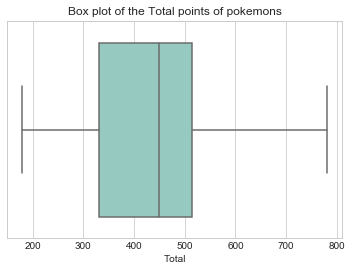

In [7]:
# box plot of the summary statistics (column total)
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.boxplot(y='Total', data=df,  orient='h').set_title('Box plot of the Total points of pokemons')
plt.show()

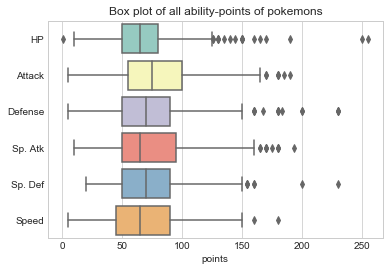

In [8]:
# box plot of column total to columns HP to Speed
sns.boxplot(data=df.iloc[:,5:11],  orient='h').set_title('Box plot of all ability-points of pokemons')
plt.xlabel('points')
plt.show()

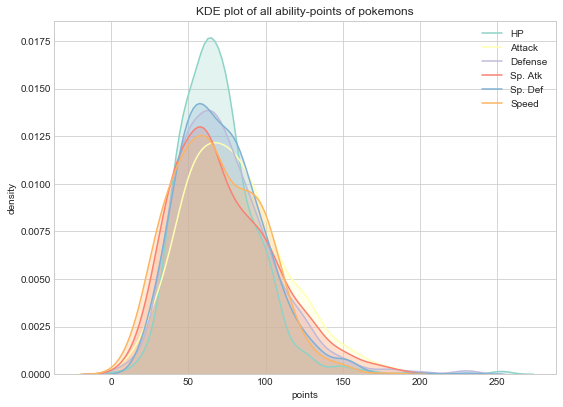

In [9]:
# kde plots.
plt.figure(figsize=(9,6.5))
for i in range(5,11):
    sns.kdeplot(df.iloc[:,i],shade=True)
plt.title('KDE plot of all ability-points of pokemons')
plt.xlabel('points')
plt.ylabel('density')
plt.show()

From the box plot made above. We see that for each ability point (__HP__,__Attack__, __Defense__, __Sp. Atk__, __Sp. Def__, __Speed__), There are numerous outliers on the right hand side, but there is very few outliers on the left hand side. This means that the distribution of the ability points are right skewed (meaning there is long right tails). Therefore, we can conclude that there are many pokemons with a very strong aspect, but very few pokemons has an extremely weak aspect. This observation, of course, is confirmed by the KDE plot we made. We guess that *legendary* pokemons might contribute to these outliers we see in the distributions (since *legendary* pokemons are known to be more powerful than non-lengendary ones). We will explore this relationship later subsection of our analysis.

Also, we can see that the __HP__ value of the pokemon in general has relatively small variences (even though there is a lot of out liers); the __Attack__, __Sp.Atk__, and __Speed__ of pokemon has relatively large variance. However, despite this relative size of variance, the distribution of all ability points are actaully very similar. We will then use a kernal density estiamtion to plot the distribution of all ability. The KDE plot made can confirm this observation we made from the box plot.

### Then, we will do the data cleaning to make the data easier for analysis

#### Change the `NaN` in the `Type 2` columns as string 'none'
* Notice that a pokemon may have a second type but it also normal of a pokemon to have only one type. So, instead of representing it as `NaN`, it may be a good idea to give it value 'none'

In [10]:
# fill the na
pokemon = df.fillna('none')
# check the head
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,1,False


#### Change the type of column `#` and column `Generation`

In [11]:
pokemon['#'] = pokemon['#'].astype(dtype='object')
pokemon['Generation'] = pokemon['Generation'].astype(dtype='object')
# check that we have done everything correctly
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null object
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null object
Legendary     800 non-null bool
dtypes: bool(1), int64(7), object(5)
memory usage: 75.9+ KB


### Next, we will explore the relationship laying inside the data

#### Question 1: It there any relationship between each pairs of the ability points?
* For example, is there any relationship between `Attack` points and `Sp. Atk` points? Would high values in `Attack` corresponds to low values in `Sp. Atk`?
* Also, is there any relationship between `HP` and `Defense`? Would high `HP` corresponds to high values in `Defense`? 

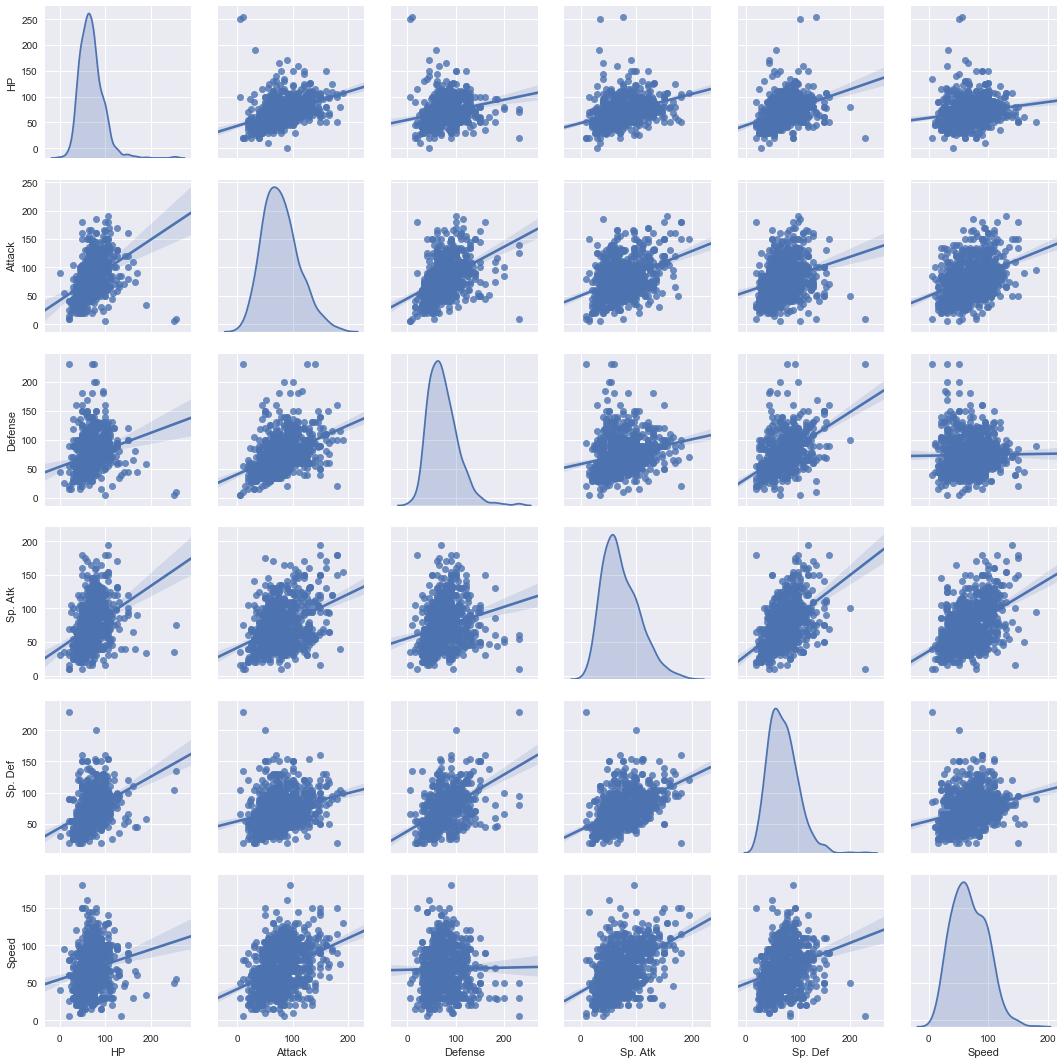

In [12]:
# produce the pair plot
sns.set()
g = sns.pairplot(pokemon.iloc[:,5:11],diag_kind='kde',diag_kws=dict(shade=True), kind = 'reg')

To help understanding the pair plot we made, we also make the correlation matrics each ability paris

In [13]:
# correlation matrix
pokemon.iloc[:,5:11].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


From the above plot and correlation matrix, we could see that several abilities of pokemons have relatively strong correlations:
1. Sp. Def and Defense has $\rho=0.511$
2. Sp. Atk and Sp.Def has $\rho=0.506$
3. Speed and Sp.Atk has $\rho=0.473$
4. Defense and Attack has $\rho=0.439$
5. Attack and HP has $\rho=0.422$

The rest of the correlation is not very strong. In fact, even the pairs I listed above does not have a very high correlation: if we run a linear regression on those pairs, we will get a $R^2 \approx 0.25$ which is not very high. 

#### Question 2: Will the abilities of the legendary pokemon differ from the non-legendary ones?
* We will first look at the total points

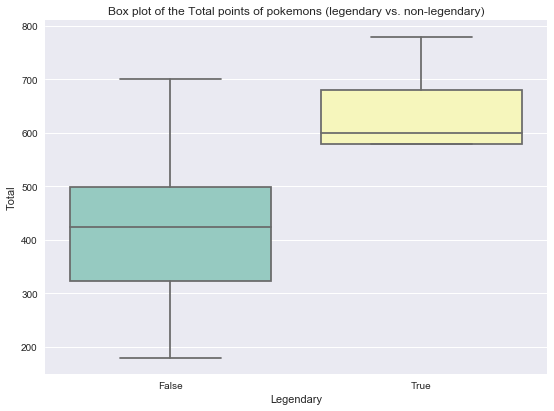

In [14]:
# box plot of total point of legendary pokemon vs. non=legendary pokemon
plt.figure(figsize=(9,6.5))
sns.boxplot(x='Legendary', 
            y='Total', 
            data=pokemon, 
            palette="Set3").set_title('Box plot of the Total points of pokemons (legendary vs. non-legendary)')
plt.show()

In [15]:
# box plot of ledendary pokemon vs. non-lengendary pokemon in terms of each ability
# first we will melt the data
pmelt = pd.melt(pokemon, 
                id_vars=['Name','Type 1','Type 2','Legendary'], 
                value_vars=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
               var_name='Ability', value_name='Points')
print(pmelt.head())

                    Name Type 1  Type 2  Legendary Ability  Points
0              Bulbasaur  Grass  Poison      False      HP      45
1                Ivysaur  Grass  Poison      False      HP      60
2               Venusaur  Grass  Poison      False      HP      80
3  VenusaurMega Venusaur  Grass  Poison      False      HP      80
4             Charmander   Fire    none      False      HP      39


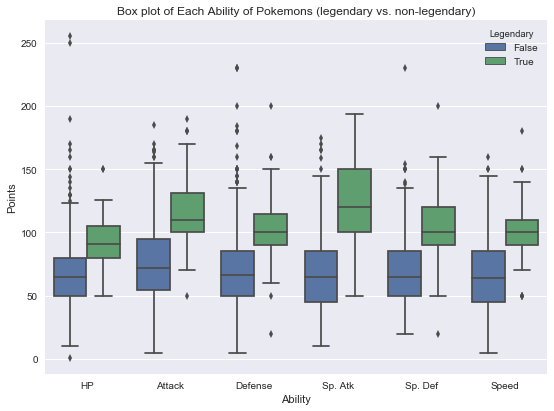

In [16]:
# make the plot
plt.figure(figsize=(9,6.5))
sns.boxplot(x='Ability',
            y='Points', 
            data= pmelt,
            hue='Legendary').set_title('Box plot of Each Ability of Pokemons (legendary vs. non-legendary)')
plt.show()

From the above plot, we can see that in general the legendary pokemons have higher abilities than those of non-legendary pokemons. Since this is true for each of the abilities of pokemons, it is very likely that this difference is significant, and legendary pokemons are indeed more powerful than regular ones.

#### Question 3: Does the abilities of pokemon from different types (we only consider Type 1 here) differ?
* We will do each ability in the order `Total`, `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`.

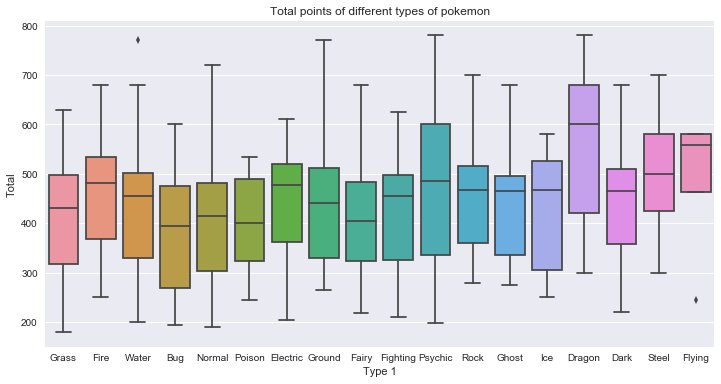

In [17]:
# Firstly, we will plot total points
plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1',y='Total', data=pokemon).set_title('Total points of different types of pokemon')
plt.show()

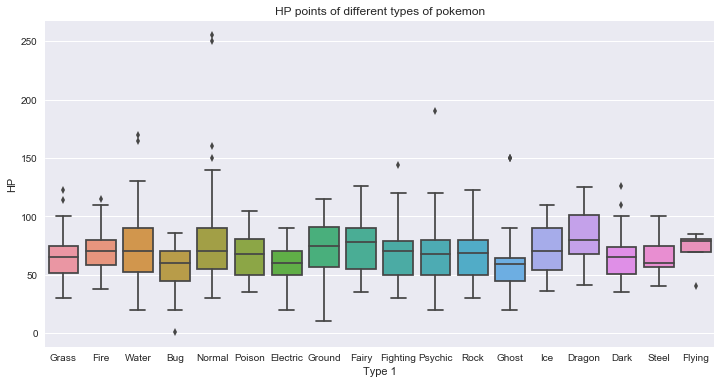

In [18]:
# Seconly, we will plot HP
plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1',y='HP', data=pokemon).set_title('HP points of different types of pokemon')
plt.show()

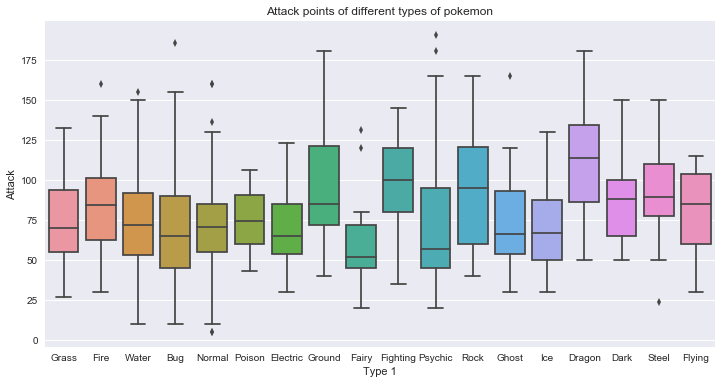

In [19]:
# Thirdly, we will plot Attack
plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1',y='Attack', data=pokemon).set_title('Attack points of different types of pokemon')
plt.show()

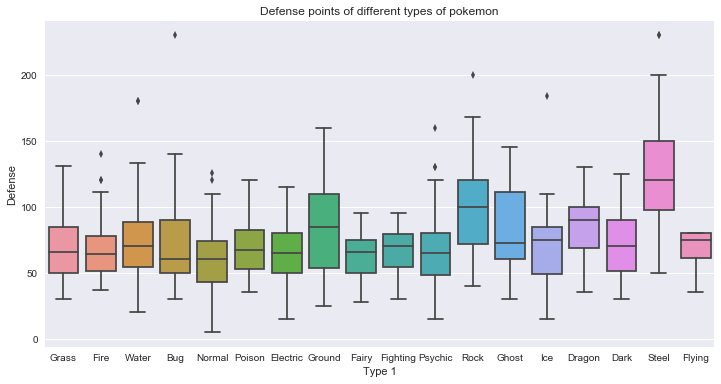

In [20]:
# Forthly, we will plot Defense
plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1',y='Defense', data=pokemon).set_title('Defense points of different types of pokemon')
plt.show()

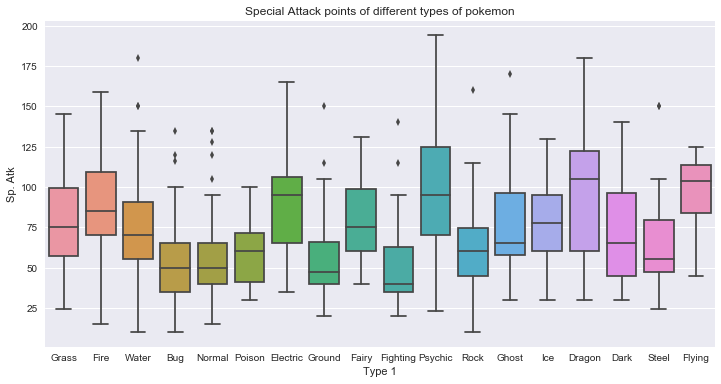

In [21]:
# Fifthly, we will plot Sp. Atk
plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1',y='Sp. Atk', data=pokemon).set_title('Special Attack points of different types of pokemon')
plt.show()

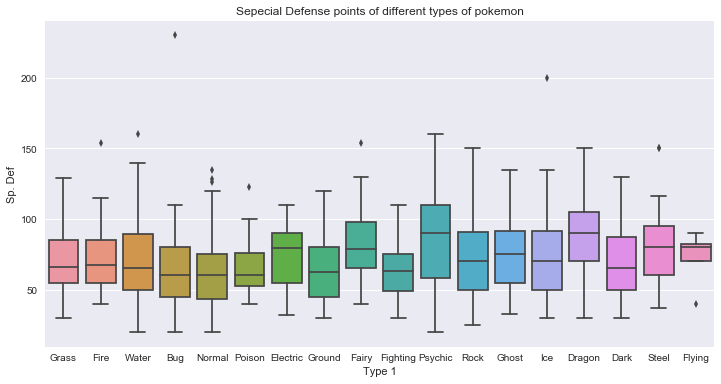

In [22]:
# Sixthly, we will plot Sp. Def
plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1',y='Sp. Def', data=pokemon).set_title('Sepecial Defense points of different types of pokemon')
plt.show()

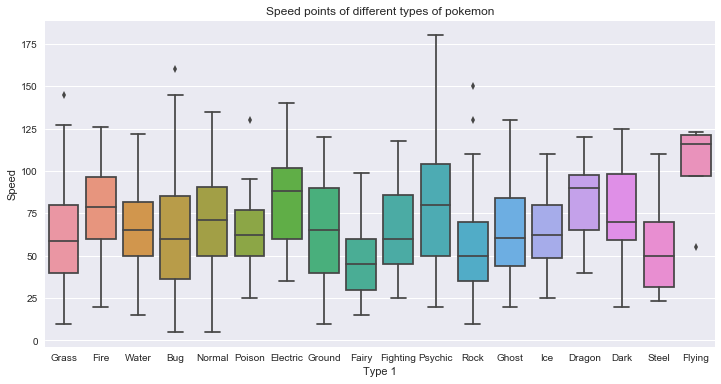

In [23]:
# Finally, we will plot Speed
plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1',y='Speed', data=pokemon).set_title('Speed points of different types of pokemon')
plt.show()

From the above plot, we see that the pokemon of different types indeed have different strengthes and weakness in their abilities:
1. Dragon pokemons tend to have a high total ability
2. Dragon, Rock, Fighting, and Ground pokemons tend to have relatively strong Attack points
3. Steel pokemons tends to have relatively strong Defense points
4. Fire, Electric, Psychic, Dragon, and Flying pokemons tend to be strong in their Special Attack. However, Bugs, Normal, Ground, Fighting pokemons are relatively week in Special Attack.
5. Flying pokemons have really high speed, but Steel and Fairy pokemons tends to be short in their speeds.
6. There is no large differences in HP and Special Defense across different types of pokemons.

#### Question 4: How does the generation of the pokemon affect their abilities?
* Again, we will do each ability in the order `Total`, `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`.

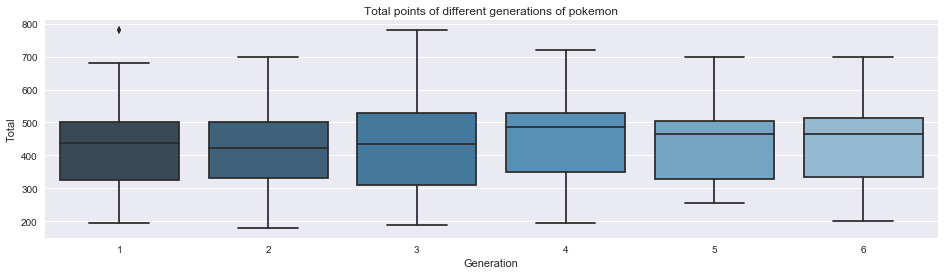

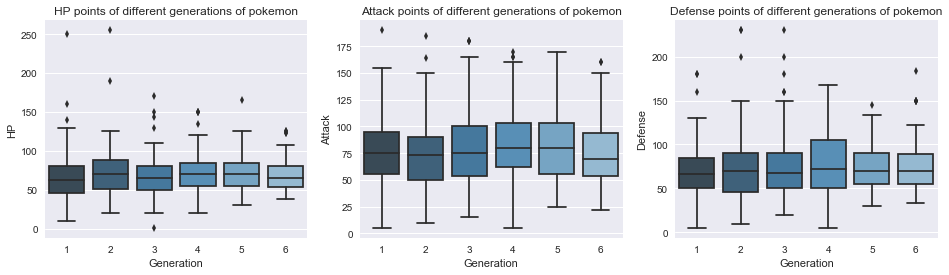

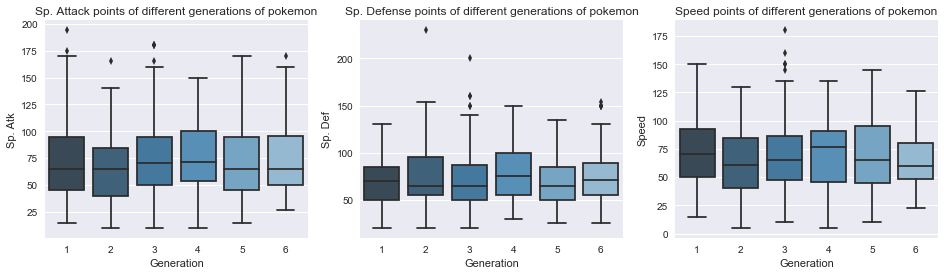

In [24]:
# plots for 'Total'
plt.figure(figsize=(16,4))
sns.boxplot(x='Generation',y='Total', data=pokemon
            , palette='Blues_d').set_title('Total points of different generations of pokemon')
plt.show()

# plots for'HP', 'Attack', and 'Defense'
_, axis = plt.subplots(1,3, figsize=(16,4))
sns.boxplot(x='Generation',y='HP', data=pokemon,
            ax=axis[0], palette='Blues_d').set_title('HP points of different generations of pokemon')
sns.boxplot(x='Generation',y='Attack', data=pokemon,
            ax=axis[1], palette='Blues_d').set_title('Attack points of different generations of pokemon')
sns.boxplot(x='Generation',y='Defense', data=pokemon,
            ax=axis[2], palette='Blues_d').set_title('Defense points of different generations of pokemon')
plt.show()

# plots for 'Sp. Atk', 'Sp. Def', 'Speed'
_, axis = plt.subplots(1,3, figsize=(16,4))
sns.boxplot(x='Generation',y='Sp. Atk', data=pokemon,
            ax=axis[0], palette='Blues_d').set_title('Sp. Attack points of different generations of pokemon')
sns.boxplot(x='Generation',y='Sp. Def', data=pokemon,
            ax=axis[1], palette='Blues_d').set_title('Sp. Defense points of different generations of pokemon')
sns.boxplot(x='Generation',y='Speed', data=pokemon,
            ax=axis[2], palette='Blues_d').set_title('Speed points of different generations of pokemon')
plt.show()


From the above plots, we see that the ability of pokemons from each generations are very similar and there is no large variances between each generations.

#### Question 5: Does the abilities of pokemons get improved if they have a second type (Type 2 is not none)?

In [25]:
# we will first process the data
question5 = pokemon.copy()
question5.loc[question5['Type 2']!='none', 'Type 2'] = 'With a second type'
q5_melt = pd.melt(question5, 
                id_vars=['Name','Type 1','Type 2'], 
                value_vars=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
                var_name='Ability', value_name='Points')
q5_melt.head()

,Name,Type 1,Type 2,Ability,Points
0,Bulbasaur,Grass,With a second type,HP,45
1,Ivysaur,Grass,With a second type,HP,60
2,Venusaur,Grass,With a second type,HP,80
3,VenusaurMega Venusaur,Grass,With a second type,HP,80
4,Charmander,Fire,none,HP,39


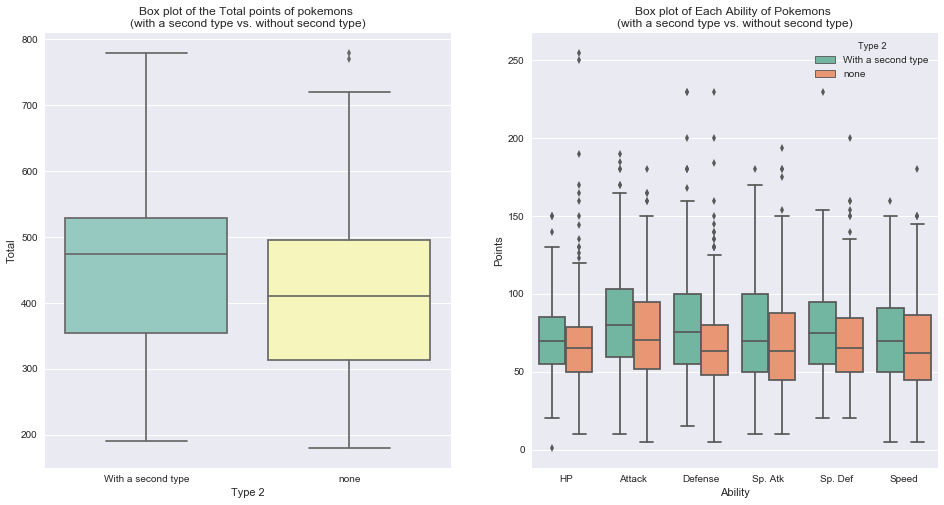

In [26]:
# make the plot 
_, axis = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='Type 2', 
            y='Total', 
            data=question5, ax = axis[0],
            palette="Set3").set_title('Box plot of the Total points of pokemons \n(with a second type vs. without second type)')

sns.boxplot(x='Ability',
            y='Points', 
            data= q5_melt, ax = axis[1],
            hue='Type 2',
            palette="Set2").set_title('Box plot of Each Ability of Pokemons \n(with a second type vs. without second type)')
plt.show()

From the above plots, it seems that the abilities of pokemons without a second type is slightly worse than those of pokemons with a second type. However, despite the fact that this differences is uniform across all aspect of the abilities, the difference of abilities between pokemons with or without a second type is fairly small.

#### Question 6: For each type (Type 1) of pokemon, does new pokemon added differ for each generation?
* We will first create a segmented bar chart for this question
* We will also find a two-way table for this question.

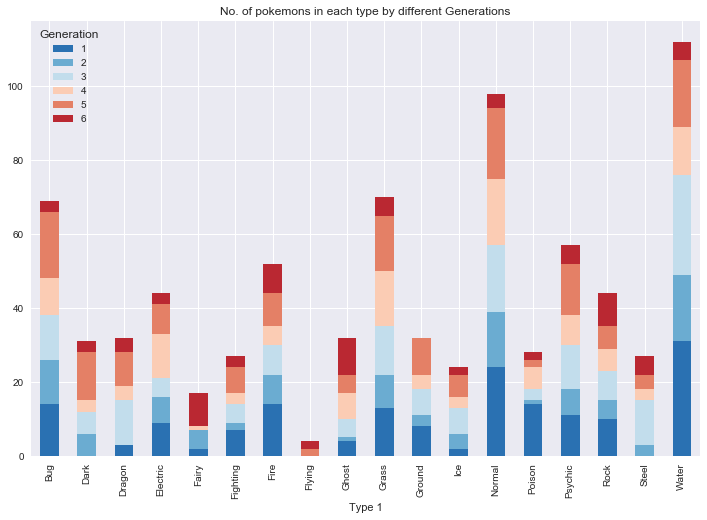

In [94]:
# Firstly, we will make the plot according to value count.
pokemon.groupby('Type 1')['Generation']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True, colormap=ListedColormap(sns.color_palette("RdBu_r",7)), figsize = (12,8))
plt.title("No. of pokemons in each type by different Generations")
plt.show()

In [50]:
two_way_table_count = pokemon.groupby('Type 1')['Generation']\
    .value_counts().unstack(level=1).fillna(0).astype('int64')
two_way_table_count['Total'] = two_way_table_count.sum(axis = 1)
two_way_table_count.loc['Total'] = two_way_table_count.sum(axis = 0)
two_way_table_count

Generation,1,2,3,4,5,6,Total
Type 1,,,,,,,
Bug,14,12,12,10,18,3,69
Dark,0,6,6,3,13,3,31
Dragon,3,0,12,4,9,4,32
Electric,9,7,5,12,8,3,44
Fairy,2,5,0,1,0,9,17
Fighting,7,2,5,3,7,3,27
Fire,14,8,8,5,9,8,52
Flying,0,0,0,0,2,2,4
Ghost,4,1,5,7,5,10,32


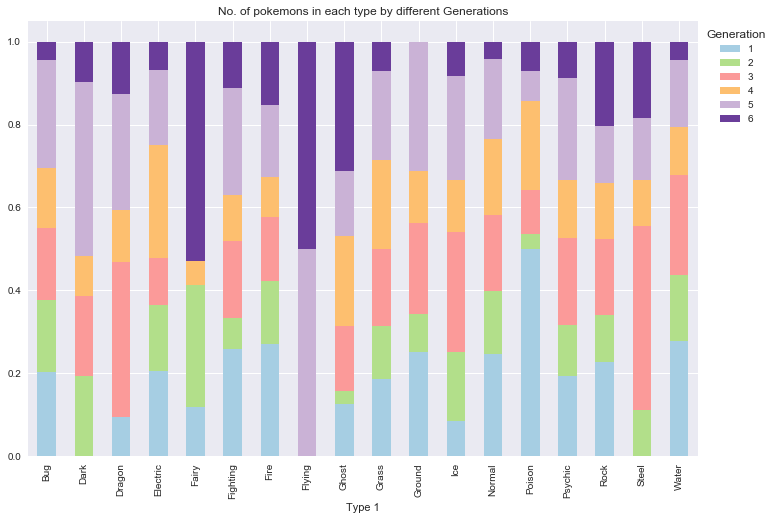

In [42]:
# we then create the plot using the percentage values
pokemon.groupby('Type 1')['Generation']\
    .value_counts(normalize = True)\
    .unstack(level=1)\
    .plot.bar(stacked=True, colormap=ListedColormap(sns.color_palette("Paired", 10)), figsize = (12,8), legend = False)
plt.title("No. of pokemons in each type by different Generations")
plt.legend(bbox_to_anchor=(1, 1), loc=2, title="Generation")
plt.show()

In [56]:
two_way_table_prop = pokemon.groupby('Type 1')['Generation']\
    .value_counts(normalize=True).unstack(level=1).fillna(0)
two_way_table_prop['Total'] = two_way_table_prop.sum(axis = 1)
two_way_table_prop.round(3)

Generation,1,2,3,4,5,6,Total
Type 1,,,,,,,
Bug,0.203,0.174,0.174,0.145,0.261,0.043,1.0
Dark,0.000,0.194,0.194,0.097,0.419,0.097,1.0
Dragon,0.094,0.000,0.375,0.125,0.281,0.125,1.0
Electric,0.205,0.159,0.114,0.273,0.182,0.068,1.0
Fairy,0.118,0.294,0.000,0.059,0.000,0.529,1.0
Fighting,0.259,0.074,0.185,0.111,0.259,0.111,1.0
Fire,0.269,0.154,0.154,0.096,0.173,0.154,1.0
Flying,0.000,0.000,0.000,0.000,0.500,0.500,1.0
Ghost,0.125,0.031,0.156,0.219,0.156,0.312,1.0


From the the result above, we can see that the number of pokemons belong to each type has very large differences. Varying from more than 100 (Type water) to only 4 (Flying). Also, for each type (Type 1) of pokemon, the number of new pokemons added differ can be very different across each generation. This is evident due to the uneven segments shown in both plots we have made above. This is also confirmed with the two way tables, where each row has very different values.